In [32]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
#export
from exp.nb_05 import *

In [34]:
x_train,y_train,x_valid,y_valid = get_data()
train_ds,valid_ds = Dataset(x_train, y_train),Dataset(x_valid, y_valid)
nh,bs = 50,512
c = y_train.max().item()+1
loss_func = F.cross_entropy

In [35]:
data = DataBunch(*get_dls(train_ds, valid_ds, bs), c)

In [36]:
class Recorder(Callback):
    def begin_fit(self): self.lrs, self.losses = [],[]
        
    def after_batch(self):
        if not self.in_train: return
        self.lrs.append(self.opt.param_groups[-1]['lr'])
        self.losses.append(self.loss.detach().cpu())
        
    def plot_lr  (self): plt.plot(self.lrs)
    def plot_loss(self): plt.plot(self.losses)

In [37]:
cbfs = [Recorder,
        partial(AvgStatsCallback,accuracy)]

In [38]:
learn = create_learner(get_model_func(0.3), loss_func, data)
run = Runner(cb_funcs=cbfs)

In [39]:
run.fit(1, learn)

train: [0.75934328125, tensor(0.8066)]
valid: [0.35221337890625, tensor(0.8984)]


iters is len(dl), allows us to keep num_epochs as a float

also , non problem in scheduler as sched(x>1) is never encountered as training finishes before that

In [42]:
run.n_iter, run.iters, run.n_epochs

(98, 10, 1.0000000000000009)

In [46]:
TrainEvalCallback??

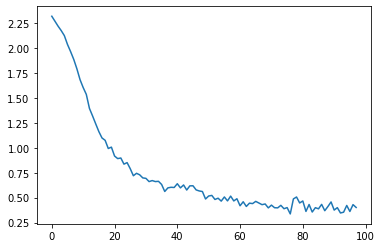

In [9]:
run.recorder.plot_loss()

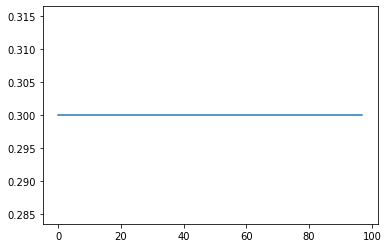

In [10]:
run.recorder.plot_lr()

In [47]:
class ParamScheduler(Callback):
    _order=1
    def __init__(self, pname, sched_func): self.pname,self.sched_func = pname,sched_func

    def set_param(self):
        #print(self.opt.param_groups[-1]['lr'])
        for pg in self.opt.param_groups:
            pg[self.pname] = self.sched_func(self.n_epochs/self.epochs)
            
    def begin_batch(self): 
        if self.in_train: self.set_param()

In [48]:
sched = combine_scheds([0.3, 0.7], [sched_cos(0.3, 0.6), sched_cos(0.6, 0.2)]) 

In [49]:
cbfs = [Recorder,
        partial(AvgStatsCallback,accuracy),
        partial(ParamScheduler, 'lr', sched)]

In [50]:
learn = create_learner(get_model_func(0.3), loss_func, data)
run = Runner(cb_funcs=cbfs)

In [51]:
run.fit(1, learn)

train: [0.731352578125, tensor(0.7954)]
valid: [0.3081337890625, tensor(0.9149)]


In [52]:
p = torch.linspace(0.01,0.999,100)
a = torch.arange(0, 100)

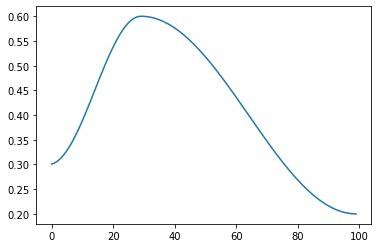

In [53]:
plt.plot(a, [sched(o) for o in p])

In [54]:
schedm = combine_scheds([0.3, 0.7], [sched_cos(0.95, 0.85), sched_cos(0.85, 0.95)]) 

Momentum Scheduling

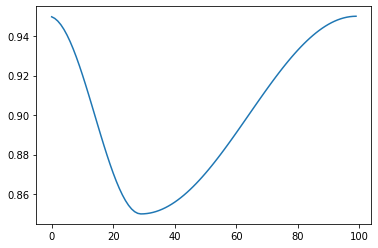

In [55]:
plt.plot(a, [schedm(o) for o in p])

In [56]:
cbfs = [Recorder,
        partial(AvgStatsCallback,accuracy),
        partial(ParamScheduler, 'lr', sched)]

learn = create_learner(get_model_func(0.3), loss_func, data)
run = Runner(cb_funcs=cbfs)

run.fit(3, learn)

train: [0.77751875, tensor(0.7864)]
valid: [0.3274927978515625, tensor(0.9027)]
train: [0.3050223828125, tensor(0.9105)]
valid: [0.255371826171875, tensor(0.9238)]
train: [0.24256822265625, tensor(0.9306)]
valid: [0.216646826171875, tensor(0.9382)]


In [57]:
cbfs = [Recorder,
        partial(AvgStatsCallback,accuracy),
        partial(ParamScheduler, 'lr', sched)]

learn = create_learner(get_model_func(0.3), loss_func, data)
run = Runner(cb_funcs=cbfs)

run.fit(1, learn)
run.fit(1, learn)
run.fit(1, learn)

train: [0.738416015625, tensor(0.7929)]
valid: [0.31120107421875, tensor(0.9115)]
train: [0.32707505859375, tensor(0.9021)]
valid: [0.248750341796875, tensor(0.9284)]
train: [0.25116921875, tensor(0.9274)]
valid: [0.2105065185546875, tensor(0.9394)]


In [61]:
class Recorder(Callback):
    def begin_fit(self): self.lrs, self.losses,self.momentums = [],[],[]
        
    def after_batch(self):
        if not self.in_train: return
        self.lrs.append(self.opt.param_groups[-1]['lr'])
        self.momentums.append(self.opt.param_groups[-1]['momentum'])
        self.losses.append(self.loss.detach().cpu())
        
    def plot_lr  (self): plt.plot(self.lrs)
    def plot_loss(self): plt.plot(self.losses)
    def plot_momentum  (self): plt.plot(self.momentums)

In [62]:
sched = combine_scheds([0.3, 0.7], [sched_cos(0.3, 0.6), sched_cos(0.6, 0.2)]) 
schedm = combine_scheds([0.3, 0.7], [sched_cos(0.95, 0.85), sched_cos(0.85, 0.95)]) 

In [63]:
cbfs = [Recorder,
        partial(AvgStatsCallback,accuracy),
        partial(ParamScheduler, 'lr', sched),
       partial(ParamScheduler, 'momentum', schedm)]

learn = create_learner(get_model_func(0.3), loss_func, data)
run = Runner(cb_funcs=cbfs)

run.fit(3, learn)

train: [0.5324540625, tensor(0.8548)]
valid: [0.1832522705078125, tensor(0.9467)]
train: [0.1713128125, tensor(0.9492)]
valid: [0.1414046875, tensor(0.9595)]
train: [0.1270034375, tensor(0.9616)]
valid: [0.1303956787109375, tensor(0.9634)]


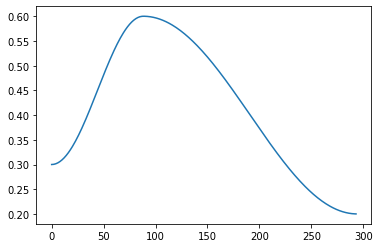

In [66]:
run.recorder.plot_lr()

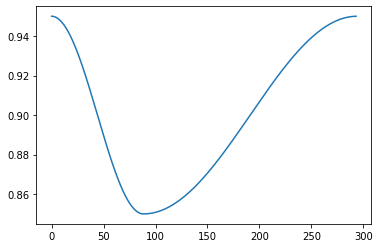

In [67]:
run.recorder.plot_momentum()

In [58]:
cbfs = [Recorder,
        partial(AvgStatsCallback,accuracy),
        partial(ParamScheduler, 'lr', sched),
        partial(ParamScheduler, 'momentum', schedm)]

learn = create_learner(get_model_func(0.3), loss_func, data)
run = Runner(cb_funcs=cbfs)

run.fit(1, learn)
run.fit(1, learn)
run.fit(1, learn)

train: [0.521160078125, tensor(0.8531)]
valid: [0.19244630126953124, tensor(0.9442)]
train: [0.16483962890625, tensor(0.9502)]
valid: [0.1555676513671875, tensor(0.9558)]
train: [0.12730796875, tensor(0.9611)]
valid: [0.129972509765625, tensor(0.9617)]
